In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

import sys

sys.path.append('../../helper_classes')
from limit_utils import get_sensitivity_bands

2025-05-14 08:00:17.986511: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747234818.160411 1782418 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747234818.199046 1782418 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747234818.558120 1782418 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747234818.558158 1782418 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747234818.558160 1782418 computation_placer.cc:177] computation placer alr

In [2]:
def get_signal_rates_from_likelihood(likelihood_file):
    sys.path.append('..')
    likelihood_class = __import__('create_simple_template_likelihood', globals(), locals(), [])
    class_names = [name for name in dir(likelihood_class) if isinstance(getattr(likelihood_class, name), type)]
    globals().update({name: getattr(likelihood_class, name) for name in class_names})
    
    likelihood_container = pkl.load(open(likelihood_file, 'rb'))
    signal_expected_mean = likelihood_container.expected_signal_counts
    
    return signal_expected_mean

In [3]:
def scaling_fn(mu, mu_ref):
    return mu / mu_ref * 1e-45

In [4]:
signal_expected_mean = get_signal_rates_from_likelihood('../wimp_sensitivity/likelihoods/SI_40t_140ty.pkl')

In [5]:
masses, bands = get_sensitivity_bands(directory='../wimp_sensitivity/outputs/SI_40t_140ty',
                                      scaling_fn=scaling_fn,
                                      signal_name='WIMP',
                                      signal_expected_mean=signal_expected_mean,
                                      inference_config='../wimp_sensitivity/inference_configs/SI_WIMP.ini')

Found 1 failed toy for WIMP40; removing...
Found 1 failed toy for WIMP46; removing...
Found 5 failed toy for WIMP65; removing...
Found 5 failed toy for WIMP91; removing...
Found 9 failed toy for WIMP129; removing...
Found 10 failed toy for WIMP182; removing...
Found 12 failed toy for WIMP361; removing...
Found 13 failed toy for WIMP508; removing...
Found 15 failed toy for WIMP5000; removing...
Found 15 failed toy for WIMP10000; removing...


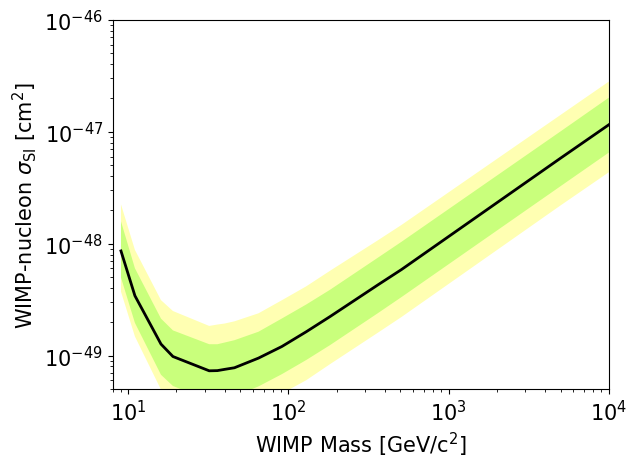

In [6]:
fig = plt.figure()
ax = fig.gca()

plt.plot(masses, bands[0], color='black', lw=2.)
plt.fill_between(masses, bands[-1], bands[1], facecolor='#00ff00', lw=0, alpha=0.3)
plt.fill_between(masses, bands[-2], bands[2], facecolor='#ffff00', lw=0, alpha=0.3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

xlab = r'WIMP Mass [GeV/c$^2$]'
xlim = (8, 10000)

ylab = r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]'
ylim = (5e-50, 1e-46)

ax.set_xlabel(xlab, fontsize=15)
ax.set_xlim(xlim)

ax.set_ylabel(ylab, fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')
ax.set_xscale('log')